In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Configuration settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('default')
sns.set_palette('husl')

In [2]:
df = pd.read_csv('/content/aerofit_treadmill_data.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
  df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


Univariate Analysis(Numerical)

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(f'{(len(num_cols))} : {num_cols}')

6 : ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


In [11]:
df[num_cols].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [42]:
for col in num_cols:
  fig,axes = plt.subplots(1,2,figsize=(2,2))
  #Left:Histogram
  sns.histplot(df[col],ax=axes[0],color='darkorange',kde=True)
  axes[0].set_title(f'{col} - Distribution')
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Frequency')
  #Right:Boxplot
  sns.boxplot(df[col],ax=axes[1],color='forestgreen')
  axes[1].set_title(f'{col} - Boxplot')
  axes[1].set_xlabel(col)
  plt.tight_layout()
  plt.show()

Univariate Analysis(Categorical)

In [13]:
cat_cols = df[['Product','Gender','MaritalStatus','Education','Usage','Fitness']]

In [43]:
for col in cat_cols:
  plt.figure(figsize=(8,4))
  df[col].value_counts().plot(kind='bar',color='coral',edgecolor='black')
  plt.title(f'{col}-Distribution')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=360)
  plt.show()

Bivariate Analysis

In [15]:
corr_matrix = df[num_cols].corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [44]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Heatmap')
plt.tight_layout()
plt.show()

Feature Analysis

In [18]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [19]:
pd.crosstab(df['Product'],df['Education'])

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,2,3,30,4,39,2,0,0
KP481,1,2,23,1,31,2,0,0
KP781,0,0,2,0,15,19,1,3


In [20]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [21]:
pd.crosstab(df['Product'],df['Usage'])

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


In [22]:
pd.crosstab(df['Product'],df['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


In [45]:
pd.crosstab(df['Product'],df['Miles'])

In [46]:
income_min = (df.groupby('Product')['Income'].min())
income_max = (df.groupby('Product')['Income'].max())
fig,axes = plt.subplots(1,2,figsize=(10,6))
income_min.plot(kind='bar',ax = axes[0],color='lightsalmon')
axes[0].set_title('Min income vs Product')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Min Income')
income_max.plot(kind='bar',ax = axes[1],color='yellowgreen')
axes[1].set_title('Max income vs Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Max Income')
plt.tight_layout()
plt.show()

Outlier Analysis

In [26]:
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower) | (df[col] > upper)]
  print(f'{col} : {len(outliers)} Outliers detected ({len(outliers)/len(df) * 100:.2f}%)')
  print(f'Range : [{lower : .2f},{upper:.2f}]')

Age : 5 Outliers detected (2.78%)
Range : [ 10.50,46.50]
Education : 4 Outliers detected (2.22%)
Range : [ 11.00,19.00]
Usage : 9 Outliers detected (5.00%)
Range : [ 1.50,5.50]
Fitness : 2 Outliers detected (1.11%)
Range : [ 1.50,5.50]
Income : 19 Outliers detected (10.56%)
Range : [ 22144.88,80581.88]
Miles : 13 Outliers detected (7.22%)
Range : [-7.12,187.88]


Multivariate Analysis

In [27]:
advanced = df[df['Product'] == 'KP781']
print('Profile of Customers buying Advanced machines')
print(f'Avg age : {advanced['Age'].mean():.1f}')
print(f'Most common Gender : {advanced['Gender'].mode()[0]}')
print(f'Most common Education Years : {advanced['Education'].mode()[0]}')
print(f'Most common Marital status : {advanced['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {advanced['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {advanced['Fitness'].mode()[0]}')
print(f'Avg Income : {advanced['Income'].mean():.1f}')
print(f'Most common Mile levels : {advanced['Miles'].mode()[0]}')

Profile of Customers buying Advanced machines
Avg age : 29.1
Most common Gender : Male
Most common Education Years : 18
Most common Marital status : Partnered
Most common Usage levels : 4
Most common Fitness levels : 5
Avg Income : 75441.6
Most common Mile levels : 100


In [28]:
mid_level = df[df['Product'] == 'KP481']
print('Profile of Customers buying Mid level machines')
print(f'Avg age : {mid_level['Age'].mean():.1f}')
print(f'Most common Gender : {mid_level['Gender'].mode()[0]}')
print(f'Most common Education Years : {mid_level['Education'].mode()[0]}')
print(f'Most common Marital status : {mid_level['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {mid_level['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {mid_level['Fitness'].mode()[0]}')
print(f'Avg Income : {mid_level['Income'].mean():.1f}')
print(f'Most common Mile levels : {mid_level['Miles'].mode()[0]}')

Profile of Customers buying Mid level machines
Avg age : 28.9
Most common Gender : Male
Most common Education Years : 16
Most common Marital status : Partnered
Most common Usage levels : 3
Most common Fitness levels : 3
Avg Income : 48973.7
Most common Mile levels : 95


In [29]:
entry = df[df['Product'] == 'KP281']
print('Profile of Customers buying Entry level machines')
print(f'Avg age : {entry['Age'].mean():.1f}')
print(f'Most common Gender : {entry['Gender'].mode()[0]}')
print(f'Most common Education Years : {entry['Education'].mode()[0]}')
print(f'Most common Marital status : {entry['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {entry['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {entry['Fitness'].mode()[0]}')
print(f'Avg Income : {entry['Income'].mean():.1f}')
print(f'Most common Mile levels : {entry['Miles'].mode()[0]}')

Profile of Customers buying Entry level machines
Avg age : 28.6
Most common Gender : Female
Most common Education Years : 16
Most common Marital status : Partnered
Most common Usage levels : 3
Most common Fitness levels : 3
Avg Income : 46418.0
Most common Mile levels : 85


In [35]:
def comprehensive_probability_analysis(df, product_col, feature_col):
    """
    Perform complete probability analysis for a two-way contingency table.

    Parameters:
    -----------
    df : DataFrame
    product_col : str - The product column (e.g., 'Product')
    feature_col : str - The feature to analyze (e.g., 'Gender')

    Returns:
    --------
    dict : Dictionary containing all probability tables and insights
    """

    print(f"PROBABILITY ANALYSIS: {product_col} × {feature_col}")

    # 1. RAW CONTINGENCY TABLE WITH MARGINS
    ct_raw = pd.crosstab(df[product_col], df[feature_col],
                          margins=True, margins_name='Total')
    print("\n📊 1. CONTINGENCY TABLE (Raw Counts with Margins):")
    print("-" * 50)
    print(ct_raw)

    # 2. MARGINAL PROBABILITIES
    print("\n📈 2. MARGINAL PROBABILITIES:")
    print("-" * 50)

    # P(Product) - Prior probability of each product
    marginal_product = df[product_col].value_counts(normalize=True).sort_index()
    print(f"\nP({product_col}) - Probability of buying each product:")
    for prod, prob in marginal_product.items():
        print(f"  P({prod}) = {prob:.4f} ({prob*100:.2f}%)")

    # P(Feature) - Prior probability of each feature value
    marginal_feature = df[feature_col].value_counts(normalize=True).sort_index()
    print(f"\nP({feature_col}) - Distribution of {feature_col}:")
    for feat, prob in marginal_feature.items():
        print(f"  P({feat}) = {prob:.4f} ({prob*100:.2f}%)")

    # 3. CONDITIONAL PROBABILITIES: P(Product | Feature)
    # "Given a customer has this feature, what's the probability they buy each product?"
    print("\n🎯 3. CONDITIONAL PROBABILITIES: P(Product | Feature)")
    print("-" * 50)
    print(f"Given a customer's {feature_col}, what product will they likely buy?")

    ct_product_given_feature = pd.crosstab(df[product_col], df[feature_col],
                                            normalize='columns')
    print(ct_product_given_feature.round(4))

    # 4. CONDITIONAL PROBABILITIES: P(Feature | Product)
    # "Given someone bought this product, what's the probability of having this feature?"
    print("\n🎯 4. CONDITIONAL PROBABILITIES: P(Feature | Product)")
    print("-" * 50)
    print(f"Given a customer bought a product, what's their likely {feature_col}?")

    ct_feature_given_product = pd.crosstab(df[product_col], df[feature_col],
                                            normalize='index')
    print(ct_feature_given_product.round(4))

    # 5. JOINT PROBABILITIES: P(Product AND Feature)
    print("\n🔗 5. JOINT PROBABILITIES: P(Product ∩ Feature)")
    print("-" * 50)

    ct_joint = pd.crosstab(df[product_col], df[feature_col], normalize='all')
    print(ct_joint.round(4))

    # 6. KEY BUSINESS INSIGHTS
    print("\n💡 6. KEY INSIGHTS:")
    print("-" * 50)

    # Find the most skewed conditional probabilities
    for col in ct_product_given_feature.columns:
        max_product = ct_product_given_feature[col].idxmax()
        max_prob = ct_product_given_feature[col].max()
        print(f"  • {col} customers most likely to buy: {max_product} ({max_prob*100:.1f}%)")

    return {
        'raw_counts': ct_raw,
        'marginal_product': marginal_product,
        'marginal_feature': marginal_feature,
        'p_product_given_feature': ct_product_given_feature,
        'p_feature_given_product': ct_feature_given_product,
        'joint_probability': ct_joint
    }

In [36]:
print("COMPLETE PROBABILITY ANALYSIS FOR AEROFIT TREADMILL DATA")

# Analysis 1: Product vs Gender
results_gender = comprehensive_probability_analysis(df, 'Product', 'Gender')

# Analysis 2: Product vs Marital Status
results_marital = comprehensive_probability_analysis(df, 'Product', 'MaritalStatus')

# Analysis 3: Product vs Fitness Level
results_fitness = comprehensive_probability_analysis(df, 'Product', 'Fitness')



COMPLETE PROBABILITY ANALYSIS FOR AEROFIT TREADMILL DATA
PROBABILITY ANALYSIS: Product × Gender

📊 1. CONTINGENCY TABLE (Raw Counts with Margins):
--------------------------------------------------
Gender   Female  Male  Total
Product                     
KP281        40    40     80
KP481        29    31     60
KP781         7    33     40
Total        76   104    180

📈 2. MARGINAL PROBABILITIES:
--------------------------------------------------

P(Product) - Probability of buying each product:
  P(KP281) = 0.4444 (44.44%)
  P(KP481) = 0.3333 (33.33%)
  P(KP781) = 0.2222 (22.22%)

P(Gender) - Distribution of Gender:
  P(Female) = 0.4222 (42.22%)
  P(Male) = 0.5778 (57.78%)

🎯 3. CONDITIONAL PROBABILITIES: P(Product | Feature)
--------------------------------------------------
Given a customer's Gender, what product will they likely buy?
Gender   Female    Male
Product                
KP281    0.5263  0.3846
KP481    0.3816  0.2981
KP781    0.0921  0.3173

🎯 4. CONDITIONAL PROBABILIT

In [37]:
# BUSINESS INTERPRETATION TEMPLATE
def generate_business_insights(df):
    """
    Generate actionable business insights from the probability analysis.
    """

    print("\n" + "="*70)
    print("📋 BUSINESS INSIGHTS & RECOMMENDATIONS")
    print("="*70)

    # Gender Analysis
    print("\n🚹🚺 GENDER INSIGHTS:")
    print("-" * 50)

    gender_product = pd.crosstab(df['Product'], df['Gender'], normalize='index')

    kp781_male_pct = gender_product.loc['KP781', 'Male'] * 100
    kp281_male_pct = gender_product.loc['KP281', 'Male'] * 100

    print(f"""
    • KP781 (Advanced) shows strong male preference: {kp781_male_pct:.1f}% male buyers
    • KP281 (Entry-level) is gender-balanced: {kp281_male_pct:.1f}% male

    RECOMMENDATION:
    - Target premium treadmill marketing toward male fitness enthusiasts
    - Explore untapped female market for advanced treadmills with tailored messaging
    - Entry-level marketing should remain gender-neutral
    """)

    # Income Analysis
    print("\n💰 INCOME INSIGHTS:")

    income_by_product = df.groupby('Product')['Income'].agg(['mean', 'min', 'max'])

    print(f"""
    Product Income Profiles:
    • KP281: Avg ${income_by_product.loc['KP281', 'mean']:,.0f} (Range: ${income_by_product.loc['KP281', 'min']:,} - ${income_by_product.loc['KP281', 'max']:,})
    • KP481: Avg ${income_by_product.loc['KP481', 'mean']:,.0f} (Range: ${income_by_product.loc['KP481', 'min']:,} - ${income_by_product.loc['KP481', 'max']:,})
    • KP781: Avg ${income_by_product.loc['KP781', 'mean']:,.0f} (Range: ${income_by_product.loc['KP781', 'min']:,} - ${income_by_product.loc['KP781', 'max']:,})

    RECOMMENDATION:
    - Position KP781 as a premium product for high-income professionals
    - KP281 and KP481 target similar income segments; differentiate on features
    """)

    # Fitness Level Analysis
    print("\n🏋️ FITNESS LEVEL INSIGHTS:")


    fitness_product = pd.crosstab(df['Product'], df['Fitness'], normalize='index')

    kp781_high_fitness = (fitness_product.loc['KP781', 4] + fitness_product.loc['KP781', 5]) * 100
    kp281_avg_fitness = fitness_product.loc['KP281', 3] * 100

    print(f"""
    • KP781 buyers are fitness enthusiasts: {kp781_high_fitness:.1f}% rate fitness 4-5
    • KP281 buyers have average fitness: {kp281_avg_fitness:.1f}% rate fitness as 3

    RECOMMENDATION:
    - Market KP781 through fitness influencers and gym partnerships
    - Position KP281 as "beginner-friendly" for fitness newcomers
    - Create upgrade path marketing from KP281 → KP781 as fitness improves
    """)

    # Usage Pattern Analysis
    print("\n📅 USAGE PATTERN INSIGHTS:")


    usage_by_product = df.groupby('Product')['Usage'].mean()

    print(f"""
    Average Weekly Usage:
    • KP281: {usage_by_product['KP281']:.1f} days/week
    • KP481: {usage_by_product['KP481']:.1f} days/week
    • KP781: {usage_by_product['KP781']:.1f} days/week

    RECOMMENDATION:
    - KP781 warranty/service should account for higher usage wear
    - Bundle KP281 with beginner workout programs (3 days/week)
    - KP781 buyers may value advanced tracking and workout variety features
    """)


In [39]:
generate_business_insights(df)


📋 BUSINESS INSIGHTS & RECOMMENDATIONS

🚹🚺 GENDER INSIGHTS:
--------------------------------------------------

    • KP781 (Advanced) shows strong male preference: 82.5% male buyers
    • KP281 (Entry-level) is gender-balanced: 50.0% male

    RECOMMENDATION: 
    - Target premium treadmill marketing toward male fitness enthusiasts
    - Explore untapped female market for advanced treadmills with tailored messaging
    - Entry-level marketing should remain gender-neutral
    

💰 INCOME INSIGHTS:

    Product Income Profiles:
    • KP281: Avg $46,418 (Range: $29,562 - $68,220)
    • KP481: Avg $48,974 (Range: $31,836 - $67,083)
    • KP781: Avg $75,442 (Range: $48,556 - $104,581)
    
    RECOMMENDATION:
    - Position KP781 as a premium product for high-income professionals
    - KP281 and KP481 target similar income segments; differentiate on features
    

🏋️ FITNESS LEVEL INSIGHTS:

    • KP781 buyers are fitness enthusiasts: 90.0% rate fitness 4-5
    • KP281 buyers have average f

In [38]:
# FINAL CUSTOMER PROFILE SUMMARY TABLE

def create_customer_profile_table(df):
    """
    Create a summary table of customer profiles for each product.
    """

    profiles = []

    for product in ['KP281', 'KP481', 'KP781']:
        subset = df[df['Product'] == product]

        profile = {
            'Product': product,
            'Segment': 'Entry' if product == 'KP281' else ('Mid' if product == 'KP481' else 'Advanced'),
            'Count': len(subset),
            'Market_Share_%': len(subset) / len(df) * 100,
            'Avg_Age': subset['Age'].mean(),
            'Age_Range': f"{subset['Age'].min()}-{subset['Age'].max()}",
            'Primary_Gender': subset['Gender'].mode()[0],
            'Male_%': (subset['Gender'] == 'Male').mean() * 100,
            'Avg_Income': subset['Income'].mean(),
            'Income_Range': f"${subset['Income'].min():,}-${subset['Income'].max():,}",
            'Avg_Education_Yrs': subset['Education'].mean(),
            'Primary_Marital': subset['MaritalStatus'].mode()[0],
            'Avg_Usage_Days': subset['Usage'].mean(),
            'Avg_Fitness_Level': subset['Fitness'].mean(),
            'Avg_Miles_Week': subset['Miles'].mean()
        }
        profiles.append(profile)

    profile_df = pd.DataFrame(profiles)

    print("\n" + "="*70)
    print("📊 CUSTOMER PROFILE SUMMARY BY PRODUCT")
    print("="*70)

    # Display key metrics
    display_cols = ['Product', 'Segment', 'Count', 'Market_Share_%', 'Avg_Age',
                    'Male_%', 'Avg_Income', 'Avg_Fitness_Level', 'Avg_Usage_Days']

    print(profile_df[display_cols].to_string(index=False))

    return profile_df

In [40]:
profile_table = create_customer_profile_table(df)


📊 CUSTOMER PROFILE SUMMARY BY PRODUCT
Product  Segment  Count  Market_Share_%  Avg_Age    Male_%  Avg_Income  Avg_Fitness_Level  Avg_Usage_Days
  KP281    Entry     80       44.444444    28.55 50.000000   46418.025             2.9625        3.087500
  KP481      Mid     60       33.333333    28.90 51.666667   48973.650             2.9000        3.066667
  KP781 Advanced     40       22.222222    29.10 82.500000   75441.575             4.6250        4.775000


Predictive Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Prepare data
X = df.drop('Product',axis=1)
X = pd.get_dummies(X,drop_first = True)
Y = df['Product'].map({'KP281':0,'KP481':1,'KP781':2})

#Train test split
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
rf = RandomForestClassifier(n_estimators = 100, random_state=42,class_weight='balanced')

rf.fit(X_train, y_train)

#Feature importance
importance = pd.DataFrame({
    'feature' : X.columns,
    'importance' : rf.feature_importances_
}).sort_values('importance',ascending=False).head()
print('Top 10 Predictors')
print(importance)

Top 10 Predictors
     feature  importance
4     Income    0.224417
5      Miles    0.214788
3    Fitness    0.155955
0        Age    0.122111
1  Education    0.120314


              precision    recall  f1-score   support

           0       0.50      0.86      0.63        14
           1       0.75      0.35      0.48        17
           2       1.00      0.80      0.89         5

    accuracy                           0.61        36
   macro avg       0.75      0.67      0.67        36
weighted avg       0.69      0.61      0.60        36



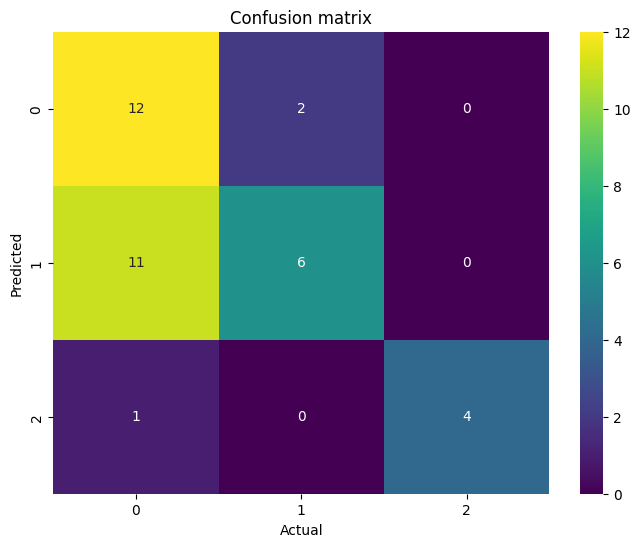

In [33]:
#Model training and prediction
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

#Accuracy score
test_accuracy = accuracy_score(y_test, y_pred)

#Confusionmatrix
cm = confusion_matrix(y_test, y_pred)

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')

#classification report
print(classification_report(y_test,y_pred))